# ДЗ по "Введение в нейронные сети (Вебинар)"

Сдавать через Гитхаб.

## Вебинар 3. TensorFlow 
* Домашнее задание:  
  -	Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. 
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точност;  
  -	Поработайте с документацией TensorFlow. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке;  
  -	*Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
   
Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность. чность

In [19]:
# Устанавливаем пакеты в окружение, если они не установлены
!pip install scikeras[tensorflow]
!pip install numpy
!pip install matplotlib

## Установим пакет tensorflow в окружение
см. [докуметация](https://www.tensorflow.org/install/pip?hl=ru)

In [1]:
!python -m pip install --upgrade pip
!pip install tensorflow

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [20]:
import keras
from keras.layers import Flatten, Dense
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Обучение и тестирование модели на Keras со сверточными слоями
Полезные ссылки:  
1. [сравнение tensorflow и keras](https://www.guru99.com/ru/tensorflow-vs-keras.html)
2. [свертка 1 сайт](https://habr.com/ru/companies/skillfactory/articles/565232/)
3. [свертка 2 сайт ](https://proglib.io/p/convolution)

In [21]:
# Импортиртируем набор данных (для обучения и тестовый) fashion_mnist из модуля Keras (картинки 28х28 пик. с изображением одежды) 
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [22]:
# Нормализуем данные (все данные в массиве, делим на 255)
x_train = x_train / 255
x_test = x_test / 255

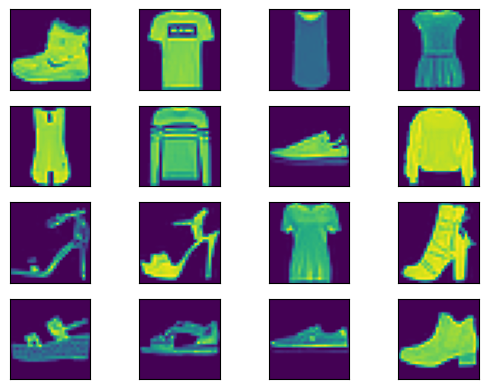

In [23]:
# Посмотрим, что за данные мы загрузили
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    # Убираем подписи к осям рисунков
    plt.xticks([])
    plt.yticks([])
plt.show()

In [24]:
# Делаем категоризацию - преобразовывает вектор класса (целые числа) в двоичную матрицу класса
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [25]:
# Задаем входной формат данных для модели
input_shape = (28, 28, 1)

In [27]:
# Создаем модель Keras - последовательная модель Sequential
model_2 = keras.Sequential([
    keras.Input(shape=input_shape),   # устанавливаем входной формат данных
    Conv2D(32, padding='same', kernel_size = (3, 3), activation = 'relu'), # Задаем число фильтров (32) и размер матрицы свертывания (3x3)
    MaxPooling2D((2, 2), strides = 2), # Задаем размер квадратика при свертывании MaxPool (2x2)
    Conv2D(64, padding='same', kernel_size = (3, 3), activation = 'relu'), # Задаем число фильтров (32) и размер матрицы свертывания (3x3)
    MaxPooling2D((2, 2), strides = 2), # Задаем размер квадратика при свертывании MaxPool (2x2)
    Flatten(),                        # сглаживание
    Dense(90, activation = 'relu'),   # Слой нейронной сети из 90 нейронов и функцией активации 'relu'
    Dense(10, activation = 'softmax') # Слой нейронной сети из 10 нейронов и функцией активации 'softmax'
    ])

### Создаём callback EarlyStopping (защита от переобучения)
см. [ссылка ToTube](https://www.youtube.com/watch?v=aiH_oXtuzjE) 

In [28]:
# Настраиваем защиту от переобучения
erly_stoping_callback = EarlyStopping(monitor='val_accuracy', patience=2)  # Если метрика 'val_accuracy' продолжает снижение два шага подряд,
                                                                           # то выходим из процесса обучения
                                                                           

### Настраиваем скорость обучения
см. [ссылка](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PiecewiseConstantDecay)

In [32]:
# Задаем переменные
EPOCH = 25                                 # Количество эпох обучения
BATCH_SIZE = 32                            # Сколько элементов массива обработает модель за один шаг обучения 
STEP_ONE_EPOCH = len(x_train)//BATCH_SIZE  # Сколько шагов в одной эпохе

In [33]:
# Настраиваем расписание обучения
boundaries = [STEP_ONE_EPOCH, STEP_ONE_EPOCH, 4*STEP_ONE_EPOCH]  # Устанавливаем количество шагов -> [1 эпоха, 1 эпоха, 4 эпохи]
values = [1e-3,0.5e-3,1e-4,0.5e-4]      # Устанавливаем коэ-т обучения, первые 3 коэф-та соответствуют шагам boundaries, а 4-й (0.5e-4), 
                                        # для всех остальных шагов 
lr_sched = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer_val = tf.keras.optimizers.Adam(lr_sched)

### Компилируем модель

In [34]:
# Компилируем модель
model_2.compile(optimizer=optimizer_val,       # выбираем оптимизатор
             loss='categorical_crossentropy',  # выбираем функцию потерь
             metrics=['accuracy'])             # выбираем метрику

In [35]:
%%time
# Обучение и сохранение истории обучения с одновременной оценкой на тестовых данных (чтобы удостовериться, что переобучения не произошло)
history = model_2.fit(x_train, y_train_cat, batch_size=BATCH_SIZE, epochs=EPOCH, validation_data =(x_test, y_test_cat), 
                      callbacks=[erly_stoping_callback])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7983 - loss: 0.5725 - val_accuracy: 0.8890 - val_loss: 0.3137
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9030 - loss: 0.2647 - val_accuracy: 0.8966 - val_loss: 0.2859
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9135 - loss: 0.2390 - val_accuracy: 0.9016 - val_loss: 0.2745
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9178 - loss: 0.2279 - val_accuracy: 0.9026 - val_loss: 0.2685
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9237 - loss: 0.2137 - val_accuracy: 0.9037 - val_loss: 0.2631
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9257 - loss: 0.2084 - val_accuracy: 0.9063 - val_loss: 0.2601
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9258 - loss: 0.2040 - val_accuracy: 0.9064 - val_loss: 0.2572
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9287 - loss: 0.

In [36]:
if erly_stoping_callback.stopped_epoch >=1:
    print('Обучение остановлено на эпохе', erly_stoping_callback.stopped_epoch)

Обучение остановлено на эпохе 20


### Отрисовка потерь и точности модели (при обучении и на тестовых данных)

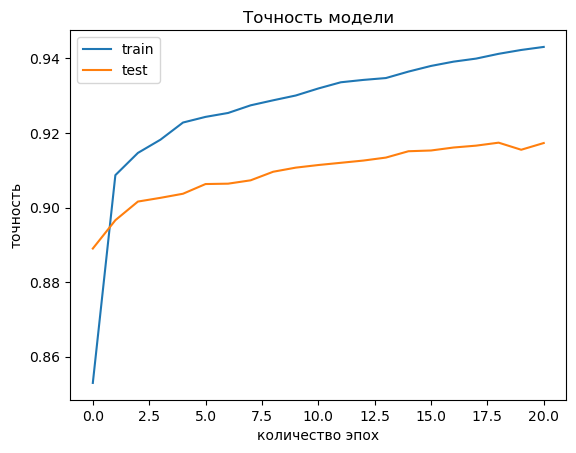

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

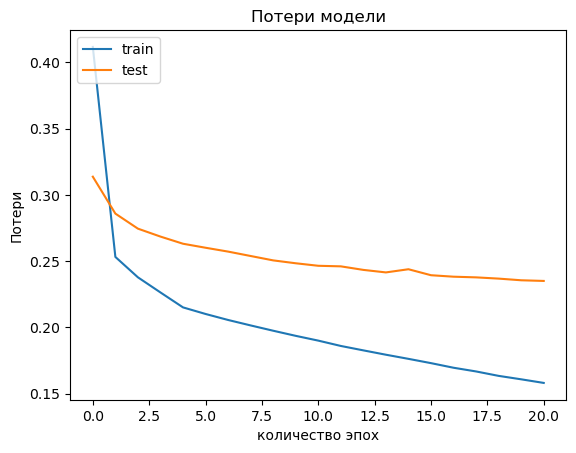

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Оценка модели

In [39]:
# Оцениваем работу загруженной модели на тестовых данных
results = model_2.evaluate(x_test, y_test_cat)
print('test loss, test acc:', results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9169 - loss: 0.2465
test loss, test acc: [0.23508615791797638, 0.9172999858856201]


In [40]:
# Смотрим архитектуру модели НС (слои, параметры, нейроны) 
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 90)             │       282,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906,169 (3.46 MB)

 Trainable params: 302,056 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604,113 (2.30 MB)

# Вывод:
  - Точность НС улучшилось, но не на много, я добавляла сверточный слой, а также увеличивала и уменьшала число нейронов в слое Dense, меняла оптимизатор, лучший результат который мне удалось получить - test loss, test acc: [0.233, 0.917].  